# Work in a pylab session, clean basic tools

In [60]:
# This %pylab magic line loads numpy, scipy, matplotlib. 
# add the word inline to put figures inline
%pylab inline
plt.xkcd();

Populating the interactive namespace from numpy and matplotlib


### Make "red" noise, by specifying the scale for exponential autocorrelation

In [61]:
x = arange(256)/256.

y = exp(-50*x/max(x))
y = detrend(y) 

## Make the complex spectrum, using fft
...normalizing by input series length, since science doesn't want the *values* of spectra to depend on sampling rate (and thus N)

In [62]:
N = len(y) 
spec = fft.fft(y) /N

# Unpack in all the usual ways: real (cos) and imaginary (sin)
specr = real(spec)
speci = imag(spec)

# Unpack in all the usual ways: amplitude and phase
ampli = abs(spec)
phase = angle(spec)

## Reconstruct (synthesize) data by meddling with phase. 

In [63]:
# Edit the spectrum's phase and amplitude:
syn_ampli = ampli

# Phase = rand() makes synthetic data
syn_phase = 2*pi*rand( len(phase) )

### Build spectrum from edited amplitude and phase, then ifft

In [64]:
# Build the synthetic spectrum from real and imaginary parts
syn_spec =(    syn_ampli*cos(syn_phase)   #real part
         + 1j* syn_ampli*sin(syn_phase) ) #imag part

# Synthesize back into physical space (time domain) with ifft: 
# First, we have to rescale by N = len(y). 
# And there is a near-zero imaginary part; strip it off with real()
syn_data = real( ifft(syn_spec)*N )

### Display the synthetic data on the raw data (Fig. 1)

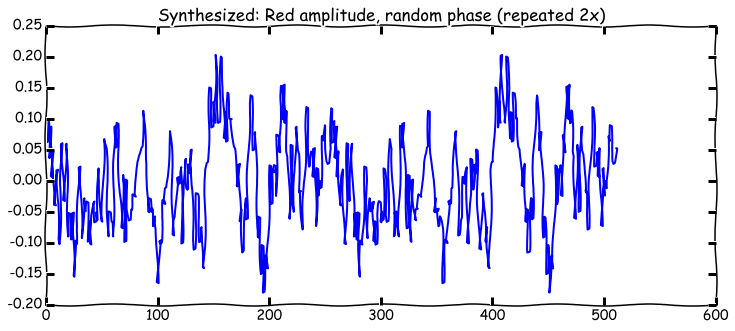

In [65]:
figure(6, figsize=[12,5])
plot(tile(syn_data,2))
title('Synthesized: Red amplitude, random phase (repeated 2x)');

## More realizations with random phases

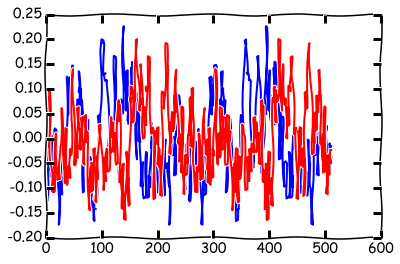

In [68]:
for i in arange(2): 
    syn_phase = 2*pi*rand( len(phase) )
    
    syn_spec =(    syn_ampli*cos(syn_phase)   #real part
             + 1j* syn_ampli*sin(syn_phase) ) #imag part
    
    syn_data = real( ifft(syn_spec)*N )
    plot(tile(syn_data,2))

### Synthetic data, from an autocorrelation function decay scale